In [50]:
import pandas as pd

# Read the CSV files
dfRestaurants = pd.read_csv('Restaurants.csv', delimiter=';')
dfProducts = pd.read_csv('Products.csv', delimiter=';')

# Display the first 5 lines of the DataFrame dfRestaurants
print("First 5 lines of dfRestaurants:")
print(dfRestaurants.head())

# Display the first 5 lines of the DataFrame dfProducts
print("First 5 lines of dfProducts:")
print(dfProducts.head())

First 5 lines of dfRestaurants:
  Restaurant ID Restaurant Name  \
0       G100050     Ramen Shifu   
1        G10044    Buenaventura   
2       G100698     Poco a Poco   
3       G100920          Beiben   
4       G100936       La Sureña   

                                            Menu URL  Rating  \
0  https://glovoapp.com/es/es/madrid/ramen-shifu-...    93.0   
1    https://glovoapp.com/es/es/madrid/buenaventura/    61.0   
2  https://glovoapp.com/es/es/madrid/poco-a-poco-...     NaN   
3   https://glovoapp.com/es/es/madrid/beiben-madrid/    91.0   
4  https://glovoapp.com/es/es/madrid/la-surena-ma...     NaN   

                                             Address   Latitude  Longitude  
0            P.º del Prado, 42, 28014 Madrid, España  40.410276  -3.693035  
1  Paseo de Santa María de la Cabeza, 39, Madrid,...  40.403102  -3.697090  
2  Plaza de Húmera Luis García Berlanga, 2, 28223...  40.429057  -3.785441  
3  Paseo de Santa María de la Cabeza, 86, 28045 M...  40.398250 

In [48]:
# Count unique restaurants from Just Eat (JE) and Glovo (G)
unique_restaurants_justeat = dfRestaurants[dfRestaurants['Restaurant ID'].str.startswith('JE')]['Restaurant ID'].nunique()
unique_restaurants_glovo = dfRestaurants[dfRestaurants['Restaurant ID'].str.startswith('G')]['Restaurant ID'].nunique()

print("Number of unique restaurants from Just Eat: ", unique_restaurants_justeat)
print("Number of unique restaurants from Glovo: ", unique_restaurants_glovo)

unique_restaurantsxproduct_justeat = dfRestaurants[dfRestaurants['Restaurant ID'].str.startswith('JE')]['Restaurant ID'].nunique()
unique_restaurantsxproduct_glovo = dfRestaurants[dfRestaurants['Restaurant ID'].str.startswith('G')]['Restaurant ID'].nunique()

print("Number of unique restaurants per product from Just Eat: ", unique_restaurantsxproduct_justeat)
print("Number of unique restaurants per product from Glovo: ", unique_restaurantsxproduct_glovo)

# Check for missing Longitude and Latitude values in dfRestaurants
missing_coordinates_count = dfRestaurants[['Longitude', 'Latitude']].isnull().any(axis=1).sum()

print(f"Number of rows with missing Longitude or Latitude values in dfRestaurants: {missing_coordinates_count}")

# Check consistency of restaurant numbers for Just Eat (JE) and Glovo (G)
if unique_restaurants_justeat == unique_restaurantsxproduct_justeat:
    print("\x1b[32m" + "Consistency of restaurant numbers: ok" + "\x1b[0m")
else:
    print("\x1b[31m" + "Consistency of restaurant numbers: not ok" + "\x1b[0m")

if unique_restaurants_glovo == unique_restaurantsxproduct_glovo:
    print("\x1b[32m" + "Consistency of unique restaurant numbers in the products table: ok" + "\x1b[0m")
else:
    print("\x1b[31m" + "Consistency of unique restaurant numbers in the products table: not ok" + "\x1b[0m")

if missing_coordinates_count == 0:
    print("\x1b[32m" + "No missing Longitude or Latitude values in dfRestaurants: ok" + "\x1b[0m")
else:
    print("\x1b[31m" + "Data not ok" + "\x1b[0m")
    
# Check duplicates in restaurant_df
duplicates_in_restaurant = dfRestaurants.duplicated().any()

# Check duplicates in products_df
duplicates_in_products = dfProducts.duplicated().any()

if duplicates_in_restaurant:
    print("\x1b[31m" + "No duplicates in restaurant.csv: not ok, there are duplicates" + "\x1b[0m")
else:
    print("\x1b[32m" + "No duplicates in restaurant.csv: ok" + "\x1b[0m")

if duplicates_in_products:
    print("\x1b[31m" + "No duplicates in products.csv: not ok, there are duplicates" + "\x1b[0m")
else:
    print("\x1b[32m" + "No duplicates in products.csv: ok" + "\x1b[0m")


Number of unique restaurants from Just Eat:  4743
Number of unique restaurants from Glovo:  2117
Number of unique restaurants per product from Just Eat:  4743
Number of unique restaurants per product from Glovo:  2117
Number of rows with missing Longitude or Latitude values in dfRestaurants: 0
Consistency of restaurant numbers: ok
Consistency of unique restaurant numbers in the products table: ok
No missing Longitude or Latitude values in dfRestaurants: ok
No duplicates in restaurant.csv: ok
No duplicates in products.csv: ok


In [49]:
#Other format checks
# Filter rows with non-empty rating values
dfRestaurants_clean = dfRestaurants.dropna(subset=['Rating'])

# Sort the DataFrame by rating in descending order and select the top 10
top_400_restaurants = dfRestaurants_clean.nlargest(4000, 'Rating')

# Print the top 10 restaurants with the best rating
print(top_400_restaurants[['Restaurant ID', 'Rating']])

# Check if all ratings have the same format
if top_400_restaurants['Rating'].apply(lambda x: isinstance(x, (int, float))).all():
    print("\x1b[32m" + "All ratings have the same format: ok" + "\x1b[0m")
else:
    print("\x1b[31m" + "Not all ratings have the same format: not ok" + "\x1b[0m")



     Restaurant ID  Rating
11           G1024   100.0
12         G102878   100.0
23         G104067   100.0
27         G104369   100.0
32         G104694   100.0
...            ...     ...
2829        JE3250    60.0
2830       JE32521    60.0
2831       JE32574    60.0
2832       JE32575    60.0
2838       JE32782    60.0

[4000 rows x 2 columns]
All ratings have the same format: ok


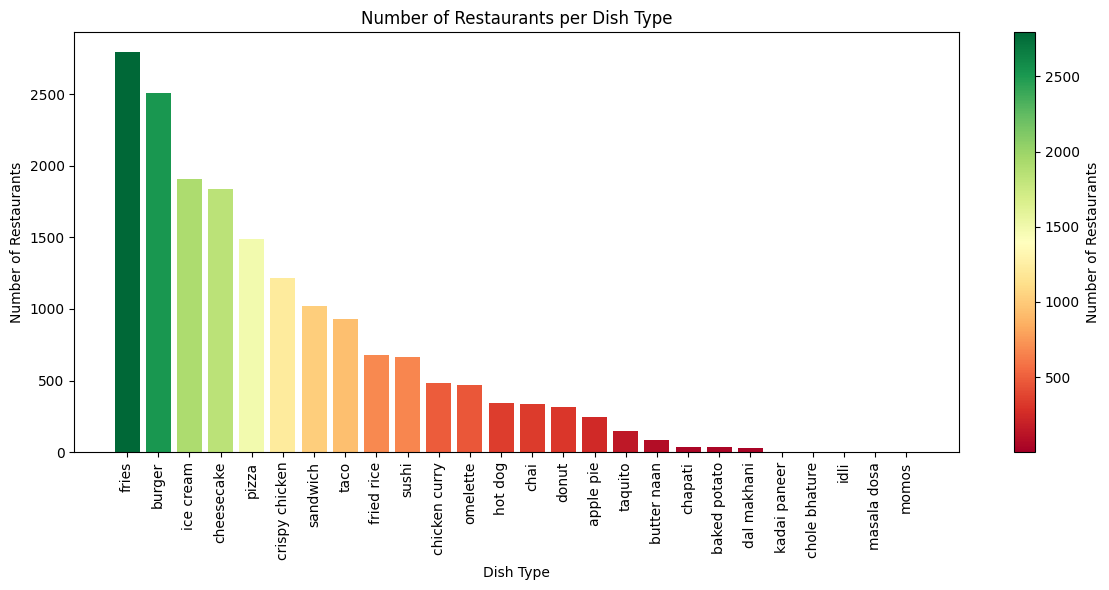

Dishes that do not appear in the dataset:
['jalebi', 'kaathi rolls', 'pakode', 'pav bhaji']

The 6 most common dishes:
Dish Name
fries             2793
burger            2511
ice cream         1910
cheesecake        1836
pizza             1490
crispy chicken    1215
Name: Restaurant ID, dtype: int64

The 6 least common dishes:
Dish Name
masala dosa       1
momos             1
idli              2
chole bhature     3
kadai paneer      4
dal makhani      29
Name: Restaurant ID, dtype: int64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming you have a DataFrame named dfProducts with columns 'Restaurant ID' and 'Dish ID'

# Dictionary to map Dish ID to dish names
dish_id_to_name = {
    '0': 'baked potato',
    '1': 'crispy chicken',
    '2': 'donut',
    '3': 'fries',
    '4': 'hot dog',
    '5': 'sandwich',
    '6': 'taco',
    '7': 'taquito',
    '8': 'apple pie',
    '9': 'burger',
    '10': 'butter naan',
    '11': 'chai',
    '12': 'chapati',
    '13': 'cheesecake',
    '14': 'chicken curry',
    '15': 'chole bhature',
    '16': 'dal makhani',
    '17': 'fried rice',
    '18': 'ice cream',
    '19': 'idli',
    '20': 'jalebi',
    '21': 'kaathi rolls',
    '22': 'kadai paneer',
    '23': 'masala dosa',
    '24': 'momos',
    '25': 'omelette',
    '26': 'pakode',
    '27': 'pav bhaji',
    '28': 'pizza',
    '29': 'sushi',
}

# Map Dish ID to dish names using the dictionary
dfProducts['Dish ID'] = dfProducts['Dish ID'].astype(str)
dfProducts['Dish Name'] = dfProducts['Dish ID'].map(dish_id_to_name)

# Count the number of unique restaurants for each dish
restaurants_per_dish = dfProducts.groupby('Dish Name')['Restaurant ID'].nunique()

# Sort the results from most to least common
restaurants_per_dish = restaurants_per_dish.sort_values(ascending=False)

# Create a color gradient from most to least using the 'RdYlGn' colormap
colors = plt.cm.RdYlGn((restaurants_per_dish - restaurants_per_dish.min()) / (restaurants_per_dish.max() - restaurants_per_dish.min()))

# Create a colorbar axis
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(restaurants_per_dish.index, restaurants_per_dish.values, color=colors)
plt.xlabel('Dish Type')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per Dish Type')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.tight_layout()

# Add colorbar to the chart using the created axis
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=restaurants_per_dish.min(), vmax=restaurants_per_dish.max()))
sm._A = []
cbar = plt.colorbar(sm, orientation='vertical', ax=ax)
cbar.set_label('Number of Restaurants')

# Show the chart
plt.show()

# Get dishes that do not appear in the dataset
missing_dishes = [dish for dish in dish_id_to_name.values() if dish not in restaurants_per_dish.index]

print("Dishes that do not appear in the dataset:")
print(missing_dishes)

# Get the 6 most common and 6 least common dishes (ignoring those with 0 restaurants)
most_common_dishes = restaurants_per_dish[restaurants_per_dish > 0].nlargest(6)
least_common_dishes = restaurants_per_dish.nsmallest(6)

print("\nThe 6 most common dishes:")
print(most_common_dishes)

print("\nThe 6 least common dishes:")
print(least_common_dishes)
